In [1]:
import numpy as np #import numpy library
import pandas as pd #import pandas library
import matplotlib.pyplot as plt #import matplot library
%matplotlib inline
import nltk.classify.util
from astropy.table import Table, Column

In [2]:
#Biometric Data individual days and merge together!

#load files
bio1 = pd.read_csv('sarahYee/basis-data-2016-04-23-metrics.csv')
bio2 = pd.read_csv('sarahYee/basis-data-2016-04-24-metrics.csv')
bio3 = pd.read_csv('sarahYee/basis-data-2016-04-25-metrics.csv')
bio4 = pd.read_csv('sarahYee/basis-data-2016-04-26-metrics.csv')
bio5 = pd.read_csv('sarahYee/basis-data-2016-04-27-metrics.csv')
bio6 = pd.read_csv('sarahYee/basis-data-2016-04-28-metrics.csv')
bio7 = pd.read_csv('sarahYee/basis-data-2016-04-29-metrics.csv')
bio8 = pd.read_csv('sarahYee/basis-data-2016-04-30-metrics.csv')
bio9 = pd.read_csv('sarahYee/basis-data-2016-05-01-metrics.csv')
bio10 = pd.read_csv('sarahYee/basis-data-2016-05-02-metrics.csv')
bio11 = pd.read_csv('sarahYee/basis-data-2016-05-03-metrics.csv')
bio12 = pd.read_csv('sarahYee/basis-data-2016-05-04-metrics.csv')


#merge bio files
bioData = bio1.append([bio2, bio3, bio4, bio5, bio6, bio7, bio8, bio9, bio10, bio11, bio12])


# # init activity col
# bioData['bike'] = 0
# bioData['run'] = 0
# bioData['walk'] = 0

# # init sleep col
# bioData['sleep'] = 0

#fix time
bioData['timestamp'] = pd.to_datetime(bioData['timestamp'], unit='s')


#make sure all merged properly!
print(bioData.shape) #print data rows and columns
bioData.head(5) #limit data to 5 rows including a header row 
# bioData.tail(5) #limit data to 5 rows including a header row 

(17280, 7)


,timestamp,heartrate,steps,calories,gsr,skintemp,airtemp
0,2016-04-23 00:00:00,91,0,1.4,0.000059,92.3,89.6
1,2016-04-23 00:01:00,92,0,1.5,0.000059,92.3,89.6
2,2016-04-23 00:02:00,94,0,1.6,0.000062,92.3,89.6
3,2016-04-23 00:03:00,95,0,1.7,0.000059,92.3,89.6
4,2016-04-23 00:04:00,98,0,1.7,0.000061,92.3,89.6


In [3]:
print(type(bioData.timestamp))

<class 'pandas.core.series.Series'>


In [4]:
bioData.dtypes

timestamp    datetime64[ns]
heartrate           float64
steps                 int64
calories            float64
gsr                 float64
skintemp            float64
airtemp             float64
dtype: object

In [5]:
bioData.gsr = bioData.gsr.fillna(0)
bioData.heartrate = bioData.heartrate.fillna(0)
bioData.steps = bioData.steps.fillna(0)
bioData.calories = bioData.calories.fillna(0)
bioData.skintemp = bioData.skintemp.fillna(0)
bioData.airtemp = bioData.airtemp.fillna(0)

In [6]:
#Activity Data individual days and merge together!

#load data
act1 = pd.read_csv('sarahYee/basis-data-2016-04-23-activities.csv') #attach Amazon data to a var called data
act2 = pd.read_csv('sarahYee/basis-data-2016-04-24-activities.csv') #attach Amazon data to a var called data
act3 = pd.read_csv('sarahYee/basis-data-2016-04-25-activities.csv') #attach Amazon data to a var called data
act4 = pd.read_csv('sarahYee/basis-data-2016-04-26-activities.csv') #attach Amazon data to a var called data
act5 = pd.read_csv('sarahYee/basis-data-2016-04-27-activities.csv') #attach Amazon data to a var called data
act6 = pd.read_csv('sarahYee/basis-data-2016-04-28-activities.csv') #attach Amazon data to a var called data
act7 = pd.read_csv('sarahYee/basis-data-2016-04-29-activities.csv') #attach Amazon data to a var called data
act8 = pd.read_csv('sarahYee/basis-data-2016-04-30-activities.csv') #attach Amazon data to a var called data
act9 = pd.read_csv('sarahYee/basis-data-2016-05-01-activities.csv') #attach Amazon data to a var called data
act10 = pd.read_csv('sarahYee/basis-data-2016-05-02-activities.csv') #attach Amazon data to a var called data
act11 = pd.read_csv('sarahYee/basis-data-2016-05-03-activities.csv') #attach Amazon data to a var called data
act12 = pd.read_csv('sarahYee/basis-data-2016-05-04-activities.csv') #attach Amazon data to a var called data

#merge bio files
actData = act1.append([act2, act3, act4, act5, act6, act7, act8, act9, act10, act11, act12])

#fix time
actData['start time'] = pd.to_datetime(actData['start time'], unit='s')
actData['end time'] = pd.to_datetime(actData['end time'], unit='s')

#make sure all merged properly!
print(actData.shape) #print data rows and columns
# bioData.head(5) #limit data to 5 rows including a header row 
actData.tail(5) #limit data to 5 rows including a header row 

(92, 19)


,start time,start time ISO,start time timezone,start time offset,end time,end time ISO,end time timezone,end time offset,type,actual seconds,steps,calories,minutes,heart rate avg,heart rate min,heart rate max,state,version,id
2,2016-05-04 19:19:07,2016-05-04T19:19:07Z,America/New_York,-240,2016-05-04 19:29:20,2016-05-04T19:29:20Z,America/New_York,-240,walk,380,904,17.400000,10.216667,109.357895,NaN,NaN,complete,1,walk__2016-05-04T191907
3,2016-05-04 19:52:24,2016-05-04T19:52:24Z,America/New_York,-240,2016-05-04 19:57:53,2016-05-04T19:57:53Z,America/New_York,-240,walk,235,533,7.100000,5.483333,96.454544,NaN,NaN,complete,1,walk__2016-05-04T195224
4,2016-05-04 20:26:49,2016-05-04T20:26:49Z,America/New_York,-240,2016-05-04 20:34:34,2016-05-04T20:34:34Z,America/New_York,-240,walk,188,345,6.400000,7.750000,106.696808,NaN,NaN,complete,1,walk__2016-05-04T202649
5,2016-05-04 20:38:37,2016-05-04T20:38:37Z,America/New_York,-240,2016-05-04 20:44:05,2016-05-04T20:44:05Z,America/New_York,-240,walk,184,340,16.200001,5.466667,133.668472,NaN,NaN,complete,1,walk__2016-05-04T203837
6,2016-05-05 00:48:54,2016-05-05T00:48:54Z,America/New_York,-240,2016-05-05 00:55:25,2016-05-05T00:55:25Z,America/New_York,-240,walk,311,725,14.000000,6.516667,103.729904,NaN,NaN,complete,1,walk__2016-05-05T004854


In [7]:
print(type(actData['start time']))

<class 'pandas.core.series.Series'>


In [8]:
print(type(actData['end time']))

<class 'pandas.core.series.Series'>


In [9]:
actData.dtypes

start time             datetime64[ns]
start time ISO                 object
start time timezone            object
start time offset               int64
end time               datetime64[ns]
end time ISO                   object
end time timezone              object
end time offset                 int64
type                           object
actual seconds                  int64
steps                         float64
calories                      float64
minutes                       float64
heart rate avg                float64
heart rate min                float64
heart rate max                float64
state                          object
version                         int64
id                             object
dtype: object

In [10]:
#Sleep Data individual days and merge together!

#load data
sleep1 = pd.read_csv('sarahYee/basis-data-2016-04-23-sleep.csv') #attach Amazon data to a var called data
sleep2 = pd.read_csv('sarahYee/basis-data-2016-04-24-sleep.csv') #attach Amazon data to a var called data
sleep3 = pd.read_csv('sarahYee/basis-data-2016-04-25-sleep.csv') #attach Amazon data to a var called data
sleep4 = pd.read_csv('sarahYee/basis-data-2016-04-26-sleep.csv') #attach Amazon data to a var called data
sleep5 = pd.read_csv('sarahYee/basis-data-2016-04-27-sleep.csv') #attach Amazon data to a var called data
sleep6 = pd.read_csv('sarahYee/basis-data-2016-04-28-sleep.csv') #attach Amazon data to a var called data
sleep7 = pd.read_csv('sarahYee/basis-data-2016-04-29-sleep.csv') #attach Amazon data to a var called data
sleep8 = pd.read_csv('sarahYee/basis-data-2016-04-30-sleep.csv') #attach Amazon data to a var called data
sleep9 = pd.read_csv('sarahYee/basis-data-2016-05-01-sleep.csv') #attach Amazon data to a var called data
sleep10 = pd.read_csv('sarahYee/basis-data-2016-05-02-sleep.csv') #attach Amazon data to a var called data
sleep11 = pd.read_csv('sarahYee/basis-data-2016-05-03-sleep.csv') #attach Amazon data to a var called data
sleep12 = pd.read_csv('sarahYee/basis-data-2016-05-04-sleep.csv') #attach Amazon data to a var called data

#merge bio files
sleepData = sleep1.append([sleep2, sleep3, sleep4, sleep5, sleep6, sleep7, sleep8, sleep9, sleep10, sleep11, sleep12])

#fix time
sleepData['start time'] = pd.to_datetime(sleepData['start time'], unit='s')
sleepData['end time'] = pd.to_datetime(sleepData['end time'], unit='s')

#make sure all merged properly!
print(sleepData.shape) #print data rows and columns
# bioData.head(5) #limit data to 5 rows including a header row 
sleepData.tail(5) #limit data to 5 rows including a header row 

(12, 24)


,start time,start time ISO,start time timezone,start time offset,end time,end time ISO,end time timezone,end time offset,light mins,deep mins,...,toss turns,type,actual seconds,calories,heart rate avg,heart rate min,heart rate max,state,version,id
0,2016-05-01 04:45:50,2016-05-01T04:45:50Z,America/New_York,-240,2016-05-01 12:43:50,2016-05-01T12:43:50Z,America/New_York,-240,219,124,...,32,sleep,28080,482.799988,67.618942,NaN,NaN,complete,2,sleep__2016-05-01T044550
0,2016-05-02 04:35:21,2016-05-02T04:35:21Z,America/New_York,-240,2016-05-02 10:51:21,2016-05-02T10:51:21Z,America/New_York,-240,195,105,...,26,sleep,22560,333.364014,66.956131,NaN,NaN,complete,2,sleep__2016-05-02T043521
0,2016-05-03 03:43:04,2016-05-03T03:43:04Z,America/New_York,-240,2016-05-03 10:17:04,2016-05-03T10:17:04Z,America/New_York,-240,200,77,...,36,sleep,22980,362.299988,70.224983,NaN,NaN,complete,2,sleep__2016-05-03T034304
0,2016-05-04 03:35:37,2016-05-04T03:35:37Z,America/New_York,-240,2016-05-04 11:30:37,2016-05-04T11:30:37Z,America/New_York,-240,223,148,...,34,sleep,28500,448.600006,69.207352,NaN,NaN,complete,2,sleep__2016-05-04T033537
0,2016-05-04 11:50:37,2016-05-04T11:50:37Z,America/New_York,-240,2016-05-04 12:22:37,2016-05-04T12:22:37Z,America/New_York,-240,31,0,...,1,sleep,1920,30.400000,70.055222,NaN,NaN,complete,2,sleep__2016-05-04T115037


In [11]:
print(type(sleepData['start time']))

<class 'pandas.core.series.Series'>


In [12]:
print(type(sleepData['end time']))

<class 'pandas.core.series.Series'>


In [13]:
sleepData.dtypes

start time             datetime64[ns]
start time ISO                 object
start time timezone            object
start time offset               int64
end time               datetime64[ns]
end time ISO                   object
end time timezone              object
end time offset                 int64
light mins                      int64
deep mins                       int64
rem mins                        int64
interruption mins               int64
unknown mins                    int64
interruptions                   int64
toss turns                      int64
type                           object
actual seconds                  int64
calories                      float64
heart rate avg                float64
heart rate min                float64
heart rate max                float64
state                          object
version                         int64
id                             object
dtype: object

In [14]:
#Journal Data individual days and merge together!

#load data
journalData = pd.read_csv('journalData/sarah.csv') #attach Amazon data to a var called data



#make sure all merged properly!
print(journalData.shape) #print data rows and columns
# bioData.head(5) #limit data to 5 rows including a header row 
journalData.tail(5) #limit data to 5 rows including a header row 

(127, 18)


,Date,Start Time,End TIme,Activity,location,"General Emotion (excited, happy, calm, anxious, sad, angry)",Qualitative,Excited,Happy,Calm,Anxious,Sad,Angry,Hungry,Tired,Bored,startTime,endTime
122,2016-05-03,15:45:00,16:00:00,sitting with sally,5th floor cage,calm,NaN,NaN,NaN,4,2,NaN,NaN,NaN,5,NaN,2016-05-03 15:45:00,2016-05-03 16:00:00
123,2016-05-03,16:30:00,17:30:00,getting mothers day cards/dads bday card,out and about,tired,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,5,NaN,2016-05-03 16:30:00,2016-05-03 17:30:00
124,2016-05-03,18:30:00,18:40:00,realized i forgot to get something to bring fo...,out and about,tired,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,5,NaN,2016-05-03 18:30:00,2016-05-03 18:40:00
125,2016-05-03,07:40:00,20:00:00,nap,home,tired,NaN,NaN,NaN,NaN,4,4,NaN,NaN,5,NaN,2016-05-03 07:40:00,2016-05-03 20:00:00
126,2016-05-03,20:48:00,09:15:00,exercise (shorter than usual... tired),home,dying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-03 20:48:00,2016-05-03 09:15:00


In [43]:
# import datetime
# dt_format="%d%m%Y"

# for i in range(0, journalData.shape[0]):
#     mydate = journalData.loc(i, 0)
#     journalData['mergeDate'] = datetime.datetime.strptime(mydate, datetime.time.min)
#     return date.strftime('%Y-%m-%d')

In [48]:
# for i in range(0, journalData.shape[0]):
journalData['Date'] = journalData['Date'].astype('datetime64[ns]')

KeyError: 'Date'

In [15]:
# journalData['Date'] = pd.to_datetime(journalData['Date'], unit='s')

journalData['Start Time'] = pd.to_datetime(journalData['Start Time'], unit='s')
journalData['End TIme'] = pd.to_datetime(journalData['End TIme'], unit='s')

journalData.dtypes


# #fix time


 Date                                                                  object
Start Time                                                     datetime64[ns]
End TIme                                                       datetime64[ns]
Activity                                                               object
location                                                               object
General Emotion (excited, happy, calm, anxious, sad, angry)            object
Qualitative                                                            object
Excited                                                               float64
Happy                                                                 float64
Calm                                                                  float64
Anxious                                                               float64
Sad                                                                   float64
Angry                                                           

In [26]:
# journalData['startTimeTest'] = pd.to_datetime(journalData.shape[0], journalData.shape[1])
for i in range(0, journalData.shape[0]):
    journalData['startTimeTest'] =  str(journalData.loc(i, 0) ) + " " + str(journalData.loc(i, 1) )



In [27]:
journalData.tail(5)

,Date,Start Time,End TIme,Activity,location,"General Emotion (excited, happy, calm, anxious, sad, angry)",Qualitative,Excited,Happy,Calm,Anxious,Sad,Angry,Hungry,Tired,Bored,startTime,endTime,startTimeTest
122,2016-05-03,2016-05-05 15:45:00,2016-05-05 16:00:00,sitting with sally,5th floor cage,calm,NaN,NaN,NaN,4,2,NaN,NaN,NaN,5,NaN,2016-05-03 15:45:00,2016-05-03 16:00:00,<pandas.core.indexing._LocIndexer object at 0x...
123,2016-05-03,2016-05-05 16:30:00,2016-05-05 17:30:00,getting mothers day cards/dads bday card,out and about,tired,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,5,NaN,2016-05-03 16:30:00,2016-05-03 17:30:00,<pandas.core.indexing._LocIndexer object at 0x...
124,2016-05-03,2016-05-05 18:30:00,2016-05-05 18:40:00,realized i forgot to get something to bring fo...,out and about,tired,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,5,NaN,2016-05-03 18:30:00,2016-05-03 18:40:00,<pandas.core.indexing._LocIndexer object at 0x...
125,2016-05-03,2016-05-05 07:40:00,2016-05-05 20:00:00,nap,home,tired,NaN,NaN,NaN,NaN,4,4,NaN,NaN,5,NaN,2016-05-03 07:40:00,2016-05-03 20:00:00,<pandas.core.indexing._LocIndexer object at 0x...
126,2016-05-03,2016-05-05 20:48:00,2016-05-05 09:15:00,exercise (shorter than usual... tired),home,dying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-03 20:48:00,2016-05-03 09:15:00,<pandas.core.indexing._LocIndexer object at 0x...


In [104]:
print(type(journalData['startTime']))

<class 'pandas.core.series.Series'>


In [105]:
print(type(journalData['startTime']))

<class 'pandas.core.series.Series'>


In [106]:
journalData.dtypes

 Date                                                                  object
Start Time                                                             object
End TIme                                                               object
Activity                                                               object
location                                                               object
General Emotion (excited, happy, calm, anxious, sad, angry)            object
Qualitative                                                            object
Excited                                                               float64
Happy                                                                 float64
Calm                                                                  float64
Anxious                                                               float64
Sad                                                                   float64
Angry                                                           

In [73]:
journalData = journalData.fillna(0)

journalData.tail(5)

,Date,Start Time,End TIme,Activity,location,"General Emotion (excited, happy, calm, anxious, sad, angry)",Qualitative,Excited,Happy,Calm,Anxious,Sad,Angry,Hungry,Tired,Bored,startTime,endTime
122,5/3/16,3:45:00 PM,4:00:00 PM,sitting with sally,5th floor cage,calm,0,0,0,4,2,0,0,0,5,0,2016-05-03 15:45:00,2016-05-03 16:00:00
123,5/3/16,4:30:00 PM,5:30:00 PM,getting mothers day cards/dads bday card,out and about,tired,0,0,0,0,3,0,0,0,5,0,2016-05-03 16:30:00,2016-05-03 17:30:00
124,5/3/16,6:30:00 PM,6:40:00 PM,realized i forgot to get something to bring fo...,out and about,tired,0,0,0,0,4,0,0,0,5,0,2016-05-03 18:30:00,2016-05-03 18:40:00
125,5/3/16,7:40:00 AM,8:00:00 PM,nap,home,tired,0,0,0,0,4,4,0,0,5,0,2016-05-03 07:40:00,2016-05-03 20:00:00
126,5/3/16,8:48:00 PM,9:15:00 AM,exercise (shorter than usual... tired),home,dying,0,0,0,0,0,0,0,0,0,0,2016-05-03 20:48:00,2016-05-03 09:15:00


In [ ]:
# df.loc(row_indexer, column_indexer)



In [27]:
for i in range(0, actData.shape[0]):
    bioData['walk'] = (actData.loc(i, 8) == 'walk' and bioData['timestamp'] >= actData.loc(i, 1) and bioData['timestamp'] <= actData.loc(i, 4) )

In [28]:
bioData.head(5) 

,timestamp,heartrate,steps,calories,gsr,skintemp,airtemp,walk
0,2016-04-23 00:00:00,91,0,1.4,0.000059,92.3,89.6,False
1,2016-04-23 00:01:00,92,0,1.5,0.000059,92.3,89.6,False
2,2016-04-23 00:02:00,94,0,1.6,0.000062,92.3,89.6,False
3,2016-04-23 00:03:00,95,0,1.7,0.000059,92.3,89.6,False
4,2016-04-23 00:04:00,98,0,1.7,0.000061,92.3,89.6,False


In [29]:
bioData.walk.mean()

0.0

In [18]:
# bioRowCount = bioData.shape[0]

# print(bioRowCount)

# condition = "(bioData['timestamp'] >= actData['start time'] and bioData['timestamp'] <= actData['end time'])"
# walkCondition = "(actData['type'].value == 'walk')"
# runCondition = "(actData['type'] == 'run')"
# bikeCondition = "(actData['type'] == 'bike')"

# for timestamp in bioData.where(condition):
#         bioData.walk = type(TRUE)

# print( actData['start time'][0])
# for i in actData.shape[0]:
    
#     for time in bioData['timestamp']:

#      if (condition):
#             if (walkCondition):
#                 bioData['walk'] = 1

            
#         bioData['bike'] = 1 if (bikeCondition) else 0;
#         bioData['run'] = 1 if (runCondition) else 0;
    
#     if (condition):
#         if (walkCondition):
#             bioData['walk'] = 1
#             print('test')


# print(bioData)
bioData.head(100)
# bioData.tail(10000)
    

,airtemp,bike,calories,gsr,heartrate,run,skintemp,sleep,steps,timestamp,walk
0,89.6,0,1.4,0.000059,91,0,92.3,0,0,2016-04-23 00:00:00,False
1,89.6,0,1.5,0.000059,92,0,92.3,0,0,2016-04-23 00:01:00,False
2,89.6,0,1.6,0.000062,94,0,92.3,0,0,2016-04-23 00:02:00,False
3,89.6,0,1.7,0.000059,95,0,92.3,0,0,2016-04-23 00:03:00,False
4,89.6,0,1.7,0.000061,98,0,92.3,0,0,2016-04-23 00:04:00,False
5,89.6,0,1.5,0.000060,91,0,92.3,0,0,2016-04-23 00:05:00,False
6,89.6,0,1.7,0.000061,93,0,92.3,0,0,2016-04-23 00:06:00,False
7,89.6,0,1.5,0.000061,93,0,92.3,0,0,2016-04-23 00:07:00,False
8,89.6,0,1.7,0.000060,97,0,92.3,0,0,2016-04-23 00:08:00,False
9,89.6,0,1.5,0.000057,92,0,92.3,0,0,2016-04-23 00:09:00,False


In [17]:
#Sleep Data individual days and merge together!

#load data
sleep1 = pd.read_csv('sarahYee/basis-data-2016-04-23-sleep.csv') #attach Amazon data to a var called data
sleep2 = pd.read_csv('sarahYee/basis-data-2016-04-24-sleep.csv') #attach Amazon data to a var called data
sleep3 = pd.read_csv('sarahYee/basis-data-2016-04-25-sleep.csv') #attach Amazon data to a var called data

#merge bio files
sleepData = sleep1.append([sleep2, sleep3])

#make sure all merged properly!
print(sleepData.shape) #print data rows and columns
# bioData.head(5) #limit data to 5 rows including a header row 
sleepData.tail(5) #limit data to 5 rows including a header row 

(3, 24)


,start time,start time ISO,start time timezone,start time offset,end time,end time ISO,end time timezone,end time offset,light mins,deep mins,...,toss turns,type,actual seconds,calories,heart rate avg,heart rate min,heart rate max,state,version,id
0,4/24/16 5:15,2016-04-24T05:15:51Z,America/New_York,-240,4/24/16 12:35,2016-04-24T12:35:22Z,America/New_York,-240,204,96,...,27,sleep,25740,442.600006,71.495384,NaN,NaN,complete,2,sleep__2016-04-24T051551
0,4/25/16 5:20,2016-04-25T05:20:10Z,America/New_York,-240,4/25/16 11:49,2016-04-25T11:49:10Z,America/New_York,-240,167,113,...,29,sleep,23340,401.299988,68.094719,NaN,NaN,complete,2,sleep__2016-04-25T052010
0,4/26/16 5:26,2016-04-26T05:26:30Z,America/New_York,-240,4/26/16 11:45,2016-04-26T11:45:30Z,America/New_York,-240,185,93,...,23,sleep,22740,390.899994,68.644577,NaN,NaN,complete,2,sleep__2016-04-26T052630


In [4]:
merge1 = pd.DataFrame({range(actData['start time'],actData['end time'], )

# list(range(10, 20))


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpScore,helpful
454995,457613,457614,B008Z5L2MW,A2W7HYIQWAJ091,"Bonnie Pierce ""TexasBonnieBelle""",0,0,5,1349049600,Outstanding - what else?,Starbucks French Roast is excellent - what els...,NaN,False
454996,283509,283510,B0045Z4JAI,AZ3GK5ZX3SVKT,gsue,2,2,2,1306195200,"Too weak, not enough umph!",I was disappointed in this product. It tasted...,1,False
454997,292569,292570,B001BM68S4,A359CZWDE8MPMF,LC,0,0,5,1314576000,Good Stuff,"<a href=""http://www.amazon.com/gp/product/B001...",NaN,False
454998,156159,156160,B002YLG5MA,A1V8J8FKBZW68K,"Ansella Adams ""Valley Lady""",4,4,5,1275350400,Way to Start the Day!,We have been using several of the Great River ...,1,True
454999,119066,119067,B004IREFUM,A1MYYCC9BSYV5Y,Colorado Mom,0,0,5,1338422400,Delicious,I love the Lively Colombian K-Cups. It is ver...,NaN,False


In [8]:
#load data
saraTotal = pd.read_csv('sarahYee/sarahTotal.csv') #attach Amazon data to a var called data

print(saraTotal.shape) #print data rows and columns
# bioData.head(5) #limit data to 5 rows including a header row 
saraTotal.tail(5) #limit

(4320, 23)


,timestamp,heartrate,steps,calories,gsr,skintemp,airtemp,walk,run,bike,...,happy,happy score,calm,calm score,anxious,anxious score,sad,sad score,angry,angry score
4315,4/25/16 23:55,71,0,1.1,0.000083,89.6,85.1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4316,4/25/16 23:56,70,0,1.0,0.000082,89.6,85.1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4317,4/25/16 23:57,69,0,1.0,0.000082,89.6,85.1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4318,4/25/16 23:58,68,0,1.1,0.000082,89.6,86.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4319,4/25/16 23:59,69,0,1.0,0.000087,89.6,86.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


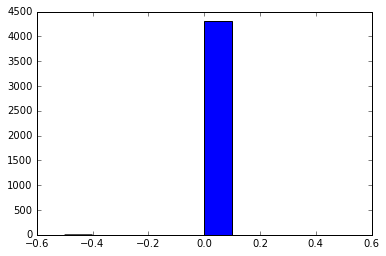

In [10]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(saraTotal["excited score"])

# Show the plot.
plt.show()

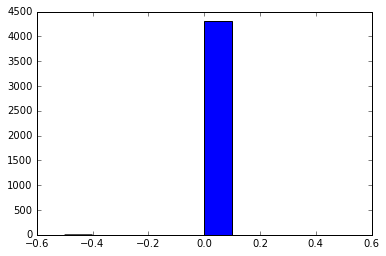

In [11]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(saraTotal["happy score"])

# Show the plot.
plt.show()

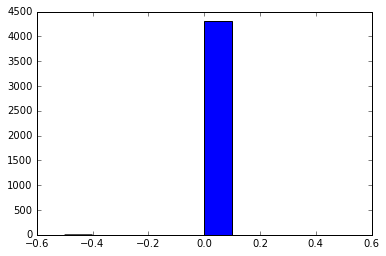

In [12]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(saraTotal["calm score"])

# Show the plot.
plt.show()

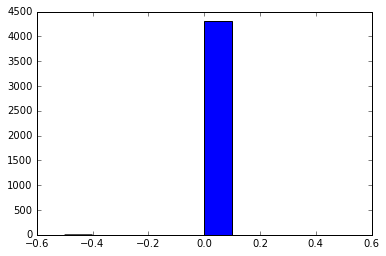

In [13]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(saraTotal["anxious score"])

# Show the plot.
plt.show()

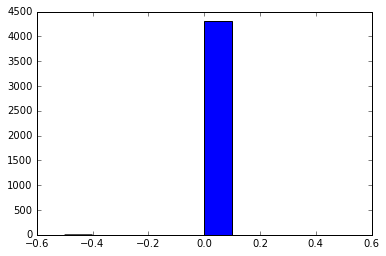

In [14]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(saraTotal["sad score"])

# Show the plot.
plt.show()

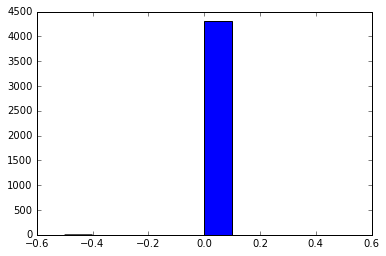

In [15]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(saraTotal["angry score"])

# Show the plot.
plt.show()

In [19]:
#convert summary NaNs into usable format
saraTotal = saraTotal.fillna('none')

In [20]:
# features from Amazon.csv to add to feature set

# Features pulled from review txt
# data['reviewLen'] = data['Text'].str.len() #captures the amount of strings present in the review (i.e. review length)
# data['hasEP'] = data['Text'].str.contains('!') #captures the presences of an exclaimation point

saraTotal['tempDiff'] = saraTotal['skintemp']-saraTotal['airtemp']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [9]:
# Taking values and making vectors
# XScore = data.iloc[:, 7].values.reshape(data.shape[0], 1)
# XreviewLen = data.iloc[:, 13].values.reshape(data.shape[0], 1)
# XhasEP = data.iloc[:, 14].values.reshape(data.shape[0], 1)
# XhasSemi = data.iloc[:, 15].values.reshape(data.shape[0], 1)

tempDiff = saraTotal.iloc[:, 24].values.reshape(data.shape[0], 1)

In [18]:

Xtoadd = np.concatenate((
        tempDiff
# #                          XScore, 
#                          XhasEP, 
#                          XhasSemi, 
#                          XhasColon, 



    ), axis=1)

saraTotal.head()

NameError: name 'tempDiff' is not defined

In [10]:
# y = data.iloc[:, 12].values
# y = np.where(y == 'true', -1, 1)

# X = data.iloc[:, 35].values #punctuation count

# plt.scatter(X[:50, 0], X[:50, 1],
# ... color='red', marker='o', label='helpfulness')

In [11]:
# report on training and test sets
global SVMerror, SVMacc, SVMtp, SVMtn, LRerror, LRacc, LRtp, LRtn, NBerror, NBacc, NBtp, NBtn, Perror, Pacc, Ptp, Ptn



def print_results(model):
    #print('Error rate on training set: ')
    erTRAIN = ((y_train != y_pred).sum() / X_train.shape[0])
    #print('Accuracy rate on training set: ')
    AccTRAIN = (1 - (y_train != y_pred).sum() / X_train.shape[0])
    #print('True positive rate on training tet:')
    TruPosTRAIN = ((y_train==True) & (y_pred==True)).sum() / y_train.sum()
    #TruNegTEST = (((y_train==False) & (y_pred_train==False)).sum() / (y_train.shape[0] - y_train.sum()))
    #print('**************')
    #('Error rate on test set: ')
    erTEST = ((y_test != y_pred_test).sum() / X_test.shape[0])
    #print('Accuracy rate on test set: ')
    AccTEST = (1 - (y_test != y_pred_test).sum() / X_test.shape[0])
    #print('True positive rate on test set')
    TruPosTEST = (((y_test==True) & (y_pred_test==True)).sum() / y_test.sum())
    #print('True negative rate on test set')
    TruNegTEST = (((y_test==False) & (y_pred_test==False)).sum() / (y_test.shape[0] - y_test.sum()))
    data_rows = [('Error Rate', erTRAIN, erTEST),
                 ('Accuracy Rate', AccTRAIN, AccTEST),
                 ('True Positives', TruPosTRAIN, TruPosTEST),
                 ('True Negatives', '--', TruNegTEST)]
    t = Table(rows=data_rows, names=(model, 'Training Set', 'Test Set'), meta={'name': model + ': Training and Test Set Results'})
    print(t)
    if model == 'SVM':
        SVMerror = erTEST
        SVMacc = AccTEST
        SVMtp = TruPosTEST
        SVMtn = TruNegTEST
        return(SVMerror, SVMacc, SVMtp, SVMtn)
    elif model == 'Logistic Regression':
        LRerror = erTEST
        LRacc = AccTEST
        LRtp = TruPosTEST
        LRtn = TruNegTEST
        return(LRerror, LRacc, LRtp, LRtn)
    elif model == 'Naive Bayes':
        NBerror = erTEST
        NBacc = AccTEST
        NBtp = TruPosTEST
        NBtn = TruNegTEST
        return(NBerror, NBacc, NBtp, NBtn)
    elif model == 'Perceptron':
        Perror = erTEST
        Pacc = AccTEST
        Ptp = TruPosTEST
        Ptn = TruNegTEST
        return(Perror, Pacc, Ptp, Ptn)
    print('done')
      
    #t.show_in_browser(jsviewer=True) 
    
    
def all_models_table():
    all_rows = [('SVM', SVMerror, SVMacc, SVMtp, SVMtn),
            ('Logistic Regression', LRerror, LRacc, LRtp, LRtn),
            ('Naive Bayes', NBerror, NBacc, NBtp, NBtn),
            ('Perceptron', Perror, Pacc, Ptp, Ptn)]
    tt = Table(rows=all_rows, names=('', 'Error Rate', 'Accuracy', 'True +', 'True -'), meta={'3/15/2016'})
    print(tt)

In [ ]:
# vectorize Bag of Words from review text; as sparse matrix
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
X = hv.transform(data.Text)
X.shape
# (455000, 131072)

# # vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import TfidfVectorizer
# tv = TfidfVectorizer(min_df=1, ngram_range=(2,17))
# X = tv.fit_transform(data.Text)

In [24]:
# convert additional features to sparse matrix and concatenate onto the bag of words sparse matrix
from scipy.sparse import csr_matrix, hstack
XtoaddSparse = csr_matrix(Xtoadd)
Xfinal = hstack([X, XtoaddSparse])
X = csr_matrix(Xfinal)

TypeError: no supported conversion for types: (dtype('O'),)

In [25]:
# define y
y = data.iloc[:, 12].values
y.shape

(455000,)

In [26]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [27]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
# decision tree classifier

# from sklearn import tree
# X = [[0, 0], [1, 1]]
# Y = [0, 1]
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, Y)

In [29]:
# MODEL: SVM, linear
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('SVM')

     SVM          Training Set      Test Set   
-------------- ----------------- --------------
    Error Rate 0.000888540031397   0.1523003663
 Accuracy Rate    0.999111459969   0.8476996337
True Positives    0.992853452729 0.444888577995
True Negatives                -- 0.879566458223


(0.15230036630036631,
 0.84769963369963364,
 0.44488857799540321,
 0.87956645822298463)

In [30]:
# MODEL: logistic regression
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Logistic Regression')

Logistic Regression    Training Set      Test Set   
------------------- ----------------- --------------
         Error Rate 0.000781789638932 0.144505494505
      Accuracy Rate    0.999218210361 0.855494505495
     True Positives    0.993714482521 0.433996202658
     True Negatives                -- 0.888839698639


(0.14450549450549449,
 0.85549450549450556,
 0.43399620265813932,
 0.88883969863945045)

In [31]:
# MODEL: Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Naive Bayes')

 Naive Bayes     Training Set       Test Set   
-------------- ---------------- ---------------
    Error Rate 0.00194662480377 0.0805054945055
 Accuracy Rate   0.998053375196  0.919494505495
True Positives   0.999354227656  0.328969721195
True Negatives               --   0.96621156902


(0.080505494505494504,
 0.91949450549450551,
 0.32896972119516338,
 0.96621156901962957)

In [32]:
# Perceptron
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='perceptron')
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Perceptron')

  Perceptron      Training Set      Test Set   
-------------- ----------------- --------------
    Error Rate 0.000813186813187 0.153282051282
 Accuracy Rate    0.999186813187 0.846717948718
True Positives    0.993542276563 0.443089837114
True Negatives                --  0.87864941143


(0.15328205128205127,
 0.8467179487179487,
 0.44308983711402017,
 0.87864941142988151)